In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tennis_data = pd.read_csv("complete_data.csv")
tennis_data.head()

,Unnamed: 0,ATP,Location,Tournament,Date,Year,Series,Court,Surface,Round,HR_win?,diff_rank,diff_prob,diff_days_since_last_match,diff_win_pct,diff_court_type_win_pct,diff_surface_type_win_pct,diff_series_type_win_pct
0,0,2,Chennai,TATA Open,2003-01-04,2003,International,Outdoor,Hard,Semifinals,0,-60,0.193,0,-0.1,0.269231,0.017544,0.223529
1,1,2,Chennai,TATA Open,2003-01-05,2003,International,Outdoor,Hard,The Final,1,-67,0.442,0,0.1,0.200000,0.090278,0.220779
2,2,3,Doha,Qatar Exxon Mobil Open,2003-01-02,2003,International,Outdoor,Hard,Quarterfinals,0,-36,0.492,0,0.3,-0.150000,0.077922,-0.042857
3,3,3,Doha,Qatar Exxon Mobil Open,2003-01-02,2003,International,Outdoor,Hard,Quarterfinals,1,-26,0.350,-1,0.5,0.352941,0.250000,0.450000
4,4,3,Doha,Qatar Exxon Mobil Open,2003-01-03,2003,International,Outdoor,Hard,Semifinals,0,-10,0.000,0,0.4,0.111111,0.117057,0.095238


In [3]:
tennis_data = tennis_data.drop("Unnamed: 0",axis=1)

In [4]:
tennis_data.head()

,ATP,Location,Tournament,Date,Year,Series,Court,Surface,Round,HR_win?,diff_rank,diff_prob,diff_days_since_last_match,diff_win_pct,diff_court_type_win_pct,diff_surface_type_win_pct,diff_series_type_win_pct
0,2,Chennai,TATA Open,2003-01-04,2003,International,Outdoor,Hard,Semifinals,0,-60,0.193,0,-0.1,0.269231,0.017544,0.223529
1,2,Chennai,TATA Open,2003-01-05,2003,International,Outdoor,Hard,The Final,1,-67,0.442,0,0.1,0.200000,0.090278,0.220779
2,3,Doha,Qatar Exxon Mobil Open,2003-01-02,2003,International,Outdoor,Hard,Quarterfinals,0,-36,0.492,0,0.3,-0.150000,0.077922,-0.042857
3,3,Doha,Qatar Exxon Mobil Open,2003-01-02,2003,International,Outdoor,Hard,Quarterfinals,1,-26,0.350,-1,0.5,0.352941,0.250000,0.450000
4,3,Doha,Qatar Exxon Mobil Open,2003-01-03,2003,International,Outdoor,Hard,Semifinals,0,-10,0.000,0,0.4,0.111111,0.117057,0.095238


In [5]:
len(tennis_data)

26408

In [6]:
tennis_data.describe()

,ATP,Year,HR_win?,diff_rank,diff_prob,diff_days_since_last_match,diff_win_pct,diff_court_type_win_pct,diff_surface_type_win_pct,diff_series_type_win_pct
count,26408.000000,26408.000000,26408.000000,26408.000000,26408.000000,26408.000000,26408.000000,26408.000000,26408.000000,26408.000000
mean,32.531846,2012.577931,0.650712,-47.165026,0.318005,-0.335769,0.106286,0.091645,0.088185,0.101707
std,18.151134,5.054269,0.476754,71.163191,0.339240,57.715555,0.196280,0.135171,0.149479,0.157941
min,1.000000,2003.000000,0.000000,-1815.000000,-1.001000,-1238.000000,-0.700000,-0.523188,-0.572039,-0.565564
25%,19.000000,2008.000000,0.000000,-56.000000,0.108750,-1.000000,0.000000,0.003979,-0.009315,-0.003285
50%,32.000000,2013.000000,1.000000,-31.000000,0.350000,0.000000,0.100000,0.087295,0.086310,0.098163
75%,49.000000,2017.000000,1.000000,-15.000000,0.570000,1.000000,0.200000,0.176750,0.183768,0.203441
max,67.000000,2021.000000,1.000000,-1.000000,0.980000,1040.000000,0.900000,0.598485,0.747253,0.885609


In [7]:
tennis_data.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Year', 'Series', 'Court',
       'Surface', 'Round', 'HR_win?', 'diff_rank', 'diff_prob',
       'diff_days_since_last_match', 'diff_win_pct', 'diff_court_type_win_pct',
       'diff_surface_type_win_pct', 'diff_series_type_win_pct'],
      dtype='object')

In [11]:
tennis_data["HR_win?"].value_counts()

yes    17184
no      9224
Name: HR_win?, dtype: int64

In [10]:
tennis_data["HR_win?"] = np.where(tennis_data["HR_win?"]!=0, "yes", "no")
eda = tennis_data[['Location', 'Tournament', 'Date', 'Series', 'Court',
       'Surface', 'Round', 'diff_prob', "HR_win?",
       'diff_win_pct', 'diff_court_type_win_pct',
       'diff_surface_type_win_pct', 'diff_series_type_win_pct']]

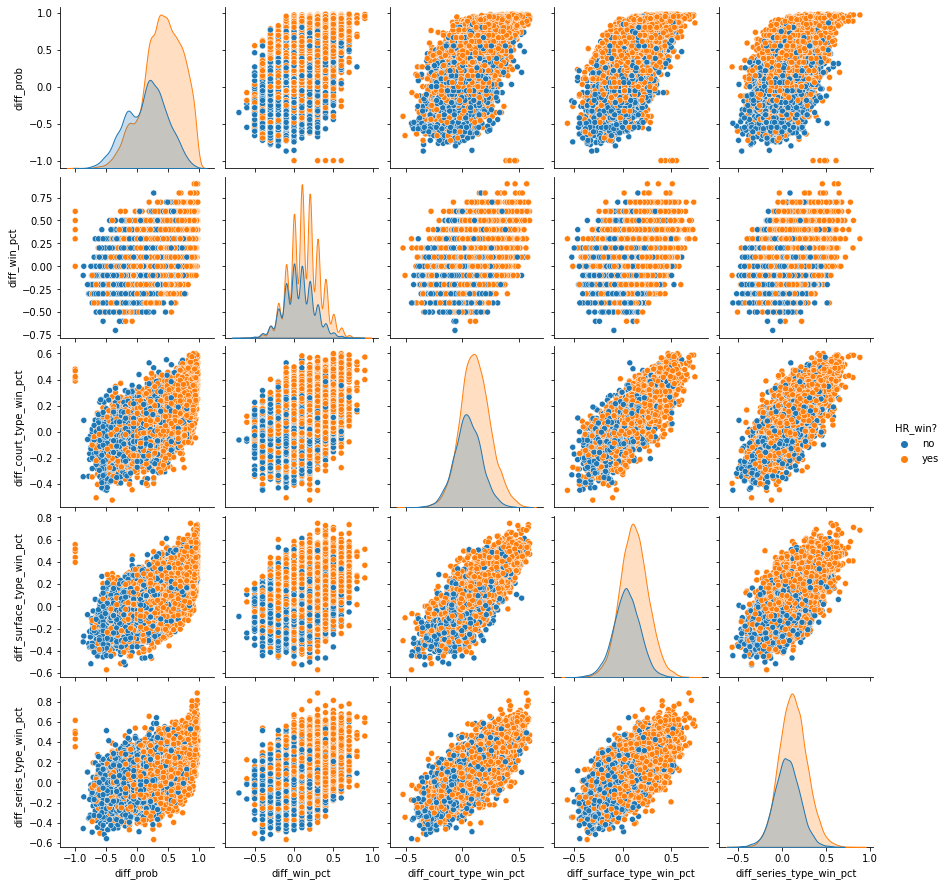

In [12]:
sns.pairplot(data=eda, hue="HR_win?")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'diff_prob'),
  Text(1, 0, 'diff_win_pct'),
  Text(2, 0, 'diff_court_type_win_pct'),
  Text(3, 0, 'diff_surface_type_win_pct'),
  Text(4, 0, 'diff_series_type_win_pct')])

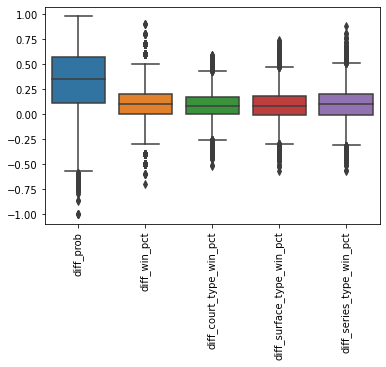

In [18]:
sns.boxplot(data=eda)
plt.xticks(rotation=90)

The median difference in historic winning percentage between higher rank and lower rank is much lower than the difference in books' probability between higher and lower ranked players, so matches are much more evenly matched than the books think.

All of the winning percentages are well correlated, so we might have to only use historical winning percentage.

In [20]:
eda.corr()

,diff_prob,diff_win_pct,diff_court_type_win_pct,diff_surface_type_win_pct,diff_series_type_win_pct
diff_prob,1.000000,0.513319,0.624181,0.675334,0.582849
diff_win_pct,0.513319,1.000000,0.371433,0.362828,0.345910
diff_court_type_win_pct,0.624181,0.371433,1.000000,0.802805,0.771331
diff_surface_type_win_pct,0.675334,0.362828,0.802805,1.000000,0.701164
diff_series_type_win_pct,0.582849,0.345910,0.771331,0.701164,1.000000


In [21]:
tennis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26408 entries, 0 to 26407
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ATP                         26408 non-null  int64  
 1   Location                    26408 non-null  object 
 2   Tournament                  26408 non-null  object 
 3   Date                        26408 non-null  object 
 4   Year                        26408 non-null  int64  
 5   Series                      26408 non-null  object 
 6   Court                       26408 non-null  object 
 7   Surface                     26408 non-null  object 
 8   Round                       26408 non-null  object 
 9   HR_win?                     26408 non-null  int64  
 10  diff_rank                   26408 non-null  int64  
 11  diff_prob                   26408 non-null  float64
 12  diff_days_since_last_match  26408 non-null  int64  
 13  diff_win_pct                264